### Exploratory Data Analysis 

Employee turnover is a key problem faced by many organizations. When good people leave, it usually costs the organization substantial time and other resources to find a replacement. Therefore, many organizations try to keep the churn rate at a low level. Imagine a company who now wants to understand its employee churn situation. Its HR (Human Resources) department gives you some data of their employees, and asks you to do exploratory data analysis and to predict employee churn.

You are free to choose any statistics library to analyze the data. In your answer, please include both the snippets of your code as well as the outputs.

Download the data `termination.csv` and `.ipynb` template from Canvas. Use the downloaded resources to answer the following questions:

#### a. (2 pts) Display a summary of the data (i.e. min, max, mean and quartiles for each variable). In the summary statistics, are there any meaningless quantities?

In [73]:
# Step 1: Load essential packages -- refer to recitation


In [74]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


In [75]:
# Step 2: load data using read_csv function

In [76]:
data = pd.read_csv('termination.csv', index_col=0)

In [77]:
data.head()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
1318,12/31/2006 0:00,1954-01-03,1989-08-28,1900-01-01,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1318,12/31/2007 0:00,1954-01-03,1989-08-28,1900-01-01,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
1318,12/31/2008 0:00,1954-01-03,1989-08-28,1900-01-01,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
1318,12/31/2009 0:00,1954-01-03,1989-08-28,1900-01-01,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
1318,12/31/2010 0:00,1954-01-03,1989-08-28,1900-01-01,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [78]:
# step 3: Invoke appropriate function on the loaded data to get the summary statistics

In [79]:
data.describe()

,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000
mean,42.077035,10.434596,27.297605,2010.612612
std,12.427257,6.325286,13.514134,2.845577
min,19.000000,0.000000,1.000000,2006.000000
25%,31.000000,5.000000,16.000000,2008.000000
50%,42.000000,10.000000,28.000000,2011.000000
75%,53.000000,15.000000,42.000000,2013.000000
max,65.000000,26.000000,46.000000,2015.000000


#### mean of store_name and STATUS_YEAR are meaningless quantities. There's no meaning to calculate the mean of store_name as it is only the store code. And status year records the year of that particular record. 

#### b. (5 pts) The data include 10 years (2006 - 2015) of records for both active and terminated employees. Status Year field shows the year of data, and Status field shows the employment status – ACTIVE or TERMINATED in the corresponding status year. The company is interested in what proportion of the staff are leaving. Compute: 1) the percent of terminated employees out of all employees for each year; 2) average termination rate over the 10 years?

In [80]:
# Step 1: Create a pivot_table indexing STATUS_YEAR and apply to STATUS column

In [81]:
pivot = pd.pivot_table(data, index=['STATUS_YEAR'], columns=['STATUS'], aggfunc='count')
df = pivot['age']
df

STATUS,ACTIVE,TERMINATED
STATUS_YEAR,,
2006,4445,134
2007,4521,162
2008,4603,164
2009,4710,142
2010,4840,123
2011,4972,110
2012,5101,130
2013,5215,105
2014,4962,253


#### The count for each value is the same since they are all from a single record, so I only choose the values to be 'age' here. 

In [82]:
# Step 2: Based on the pivot_table, find total number of employees each year

In [83]:
df['num_of_employees'] = df.iloc[:,0:2].sum(axis=1)
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


STATUS,ACTIVE,TERMINATED,num_of_employees
STATUS_YEAR,,,
2006,4445,134,4579
2007,4521,162,4683
2008,4603,164,4767
2009,4710,142,4852
2010,4840,123,4963
2011,4972,110,5082
2012,5101,130,5231
2013,5215,105,5320
2014,4962,253,5215


In [84]:
# Step 3: Now compute the percentage


In [85]:
df['percentage'] = df['TERMINATED'] / df['num_of_employees']
df

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


STATUS,ACTIVE,TERMINATED,num_of_employees,percentage
STATUS_YEAR,,,,
2006,4445,134,4579,0.029264
2007,4521,162,4683,0.034593
2008,4603,164,4767,0.034403
2009,4710,142,4852,0.029266
2010,4840,123,4963,0.024783
2011,4972,110,5082,0.021645
2012,5101,130,5231,0.024852
2013,5215,105,5320,0.019737
2014,4962,253,5215,0.048514


In [86]:
# Step 4: Invoke a function to compute average on the calculated percentage.

In [87]:
print('Average termination rate:')
'{0:.2%}'.format(df['percentage'].mean())

Average termination rate:


'3.00%'

#### c.(5 pts) In addition to the proportion of terminated employees, the company wants to know more about different types of termination. Give a stacked bar chart of terminates, where x-axis is status year, y-axis is number of terminated employees, and different colors in a bar show different termination reasons (‘termreason desc’ field in the data). What do you observe in this plot?

In [88]:
# Step 1: Filter dataframe for the relevant status for this question

In [89]:
df1 = data[data['STATUS'] == 'TERMINATED']
df1.head()

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
EmployeeID,,,,,,,,,,,,,,,,,
3987,9/1/2010 0:00,1945-09-03,1997-03-11,2010-09-03,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2010,TERMINATED,STORES
4107,1/1/2011 0:00,1946-01-12,1997-07-20,2011-01-12,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2011,TERMINATED,STORES
4347,9/1/2006 0:00,1946-09-23,1998-03-31,2006-09-23,60,8,Abbotsford,Bakery,Baker,1,M,Male,Retirement,Voluntary,2006,TERMINATED,STORES
4263,6/1/2011 0:00,1946-06-22,1997-12-28,2011-06-22,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2011,TERMINATED,STORES
4707,10/1/2012 0:00,1947-10-30,1999-05-07,2012-10-30,65,13,Abbotsford,Bakery,Baker,1,F,Female,Retirement,Voluntary,2012,TERMINATED,STORES


In [90]:
# Step 2: Similar to part (b) create pivot table on column termreason_desc

In [91]:
pivot2 = pd.pivot_table(df1, index=['STATUS_YEAR'], columns=['termreason_desc'],aggfunc='count')['age']
pivot2

termreason_desc,Layoff,Resignaton,Retirement
STATUS_YEAR,,,
2006,NaN,12.0,122.0
2007,NaN,25.0,137.0
2008,NaN,26.0,138.0
2009,NaN,18.0,124.0
2010,NaN,29.0,94.0
2011,NaN,69.0,41.0
2012,NaN,76.0,54.0
2013,NaN,49.0,56.0
2014,142.0,55.0,56.0


In [92]:
# Step 3: Plot stacked bar chart using pandas plot bar function


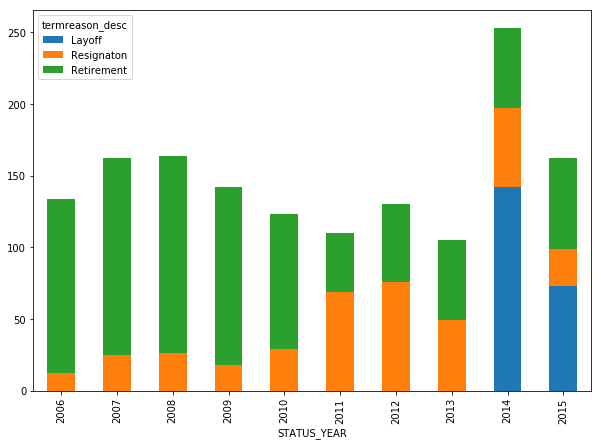

In [93]:
pivot2.loc[:,['Layoff','Resignaton', 'Retirement']].plot.bar(stacked=True, figsize=(10,7))

#### From 2006-2010, the major reason for termination is retirement. From 2011-2012, resignation arises as a major termination reason. Before 2013, there is no Layoff while from 2014-2015, percentage of layoff increased dramatically and dominated the termination. 

#### d. (3 pts) Does Age affect termination? Draw (2) Box-plots of Age for active and terminated employees separately. What does the box-plot tell you?

In [94]:
# Step 1: Use pandas boxplot for this part

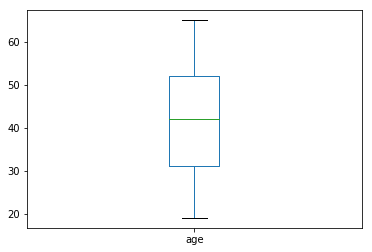

In [95]:
active_employees = data[data['STATUS'] == 'ACTIVE']
active_employees['age'].plot.box()

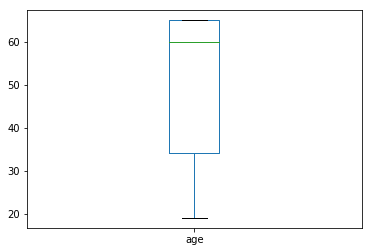

In [96]:
terminated_employees = data[data['STATUS'] == 'TERMINATED']
terminated_employees['age'].plot.box()

#### The age distribution seems to be significantly different for terminated and active employees. The mean of age of terminated employees is around 60 while that of active employees is around 40. 